# CHAPTER 10 - SIMPLE LINEAR REGRESSION

##  By Konstantine Katona

## What does a Simple Linear Regression Model do?

#### It estimate the relationship between two quantitative variables.

In [1]:
# I had to get my friends help on this one due to being in the hospital
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.DataFrame(sns.load_dataset('diamonds'))

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##  Pearson Correlation Coefficient (r-value)
- R value is a correlation coefficient that measures the strength of the relationship between two variables, as well as the direction on a scatterplot.
- R value ranges from -1 to 1
- R values >0 indicate positive correlation
- R values <0 indicate negitive correlation
- R values of 0 indicate no correlation

In [4]:
data.select_dtypes(include=[np.number]).corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

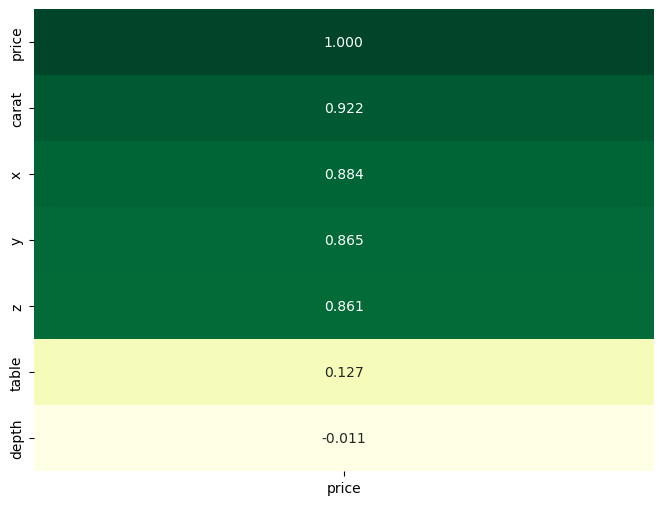

In [5]:

plt.figure(figsize=(8, 6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr().head(7)[['price']].sort_values(by='price', ascending=False).head(10),
annot=True, fmt='.3f', cmap='YlGn', cbar=False)

## Procedure for Creating and Using a Regression Model
1. Establishing models with a theory
2. Collecting data 
3. Estimating and interpreting the models
4. Conducting statistical inference and forecasting

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = data[['carat']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [8]:
model = LinearRegression()
print(model)

LinearRegression()


In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
model.score(X_test, y_test)

0.8504107786474794

In [11]:
predicted_values = model.predict(X_test)
print(predicted_values)


[9540.64191438 1940.07543252 3180.98424589 ... 9618.19871522 -464.18539337
 5507.68827094]


In [12]:
predicted_df = pd.DataFrame(predicted_values, columns=['predicted_price'])
predicted_df.head(3)


,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
joined_data = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), predicted_df], axis=1)
joined_data.head(5)


,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [14]:
melted_data = pd.melt(joined_data,id_vars=['carat'], value_vars=['price', 'predicted_price'], var_name='Price_type', value_name='Price_value')
melted_data.head()

,carat,Price_type,Price_value
0,1.52,price,8674.0
1,0.54,price,1637.0
2,0.70,price,2657.0
3,0.59,price,1838.0
4,0.86,price,2980.0


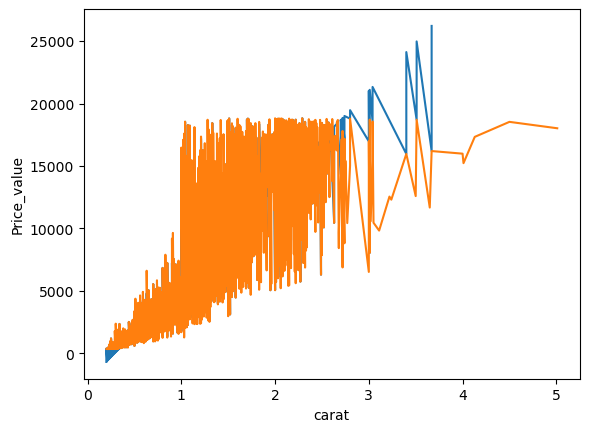

In [15]:
## Im in so much pain right now this is the best I can do
sns.lineplot(data=pd.melt(joined_data,id_vars=['carat'], value_vars=['price', 'predicted_price'], var_name='Price_type', value_name='Price_value'), x='carat', y='Price_value',estimator=None )
sns.lineplot(x = data['carat'],y = data['price'], estimator=None)
plt.xlabel('carat')
plt.ylabel('Price_value')
plt.show()

## Regression line equation is **Y=mx+b**, where...
- y is **dependent** variable
- m is the **slope** of the line
- x is the **idependent** variable
- b is the **Y-intercept**

In [16]:
X = data.carat.values.reshape(-1,1)
y = data.price



In [17]:
lr = LinearRegression()
predicted = lr.fit(X,y)



In [18]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')


The slope is [7756.42561797] and the y-intercept is -2256.360580045392


In [19]:
print(f'Equation of the regression line: y = {m}x + {b}')

Equation of the regression line: y = [7756.42561797]x + -2256.360580045392


In [20]:
carat_0_70 = 0.70
price_0_70 = lr.predict([[carat_0_70]])
print(f'The estimated price of a {carat_0_70} carat diamond is ${price_0_70[0]:.2f}')

The estimated price of a 0.7 carat diamond is $3173.14


In [21]:
carat_0_54 = 0.54
price_0_54 = lr.predict([[carat_0_54]])
print(f'The estimated price of a {carat_0_54} carat diamond is ${price_0_54[0]:.2f}')

The estimated price of a 0.54 carat diamond is $1932.11


In [ ]:
## the estimates are nearly identical to the predicted price from #18